Business Performance Dashboard

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('Startups.csv', encoding = 'unicode_escape')

In [117]:
df.shape

(250, 5)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Company      250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [124]:
df.head(30)

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States
2,Stripe,95.0,March-21,Financial services,Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia
5,Instacart,39.0,March-21,Retail,United States
6,Databricks,38.0,August-21,Software,United States
7,Revolut,33.0,July-21,Fintech,United Kingdom
8,Nubank,30.0,June-21,Financial services,Brazil


Clean the Dataset

In [120]:
#The 'company' column name is not loaded properly.
df = df.rename(columns={'ï»¿Company': 'Company'})

In [121]:
#Industry has some blank values, mark them with a new field called 'unknown'
df['Industry'] = df['Industry'].fillna('Unknown')

In [122]:
#Some companies belong to more than 1 country, so split them into multiple rows
df = df.assign(Country=df['Country'].str.split(',|/')).explode('Country')
df['Country'] = df['Country'].str.strip()

In [123]:
# Remove noise (stary chaarcters) from country
import re
df['Country'] = df['Country'].astype(str).str.replace('Â', '', regex=False)
df['Country'] = df['Country'].str.strip()

Start building plots

In [125]:
# Set plot style
sns.set(style="whitegrid")

<ipython-input-126-05699844d815>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


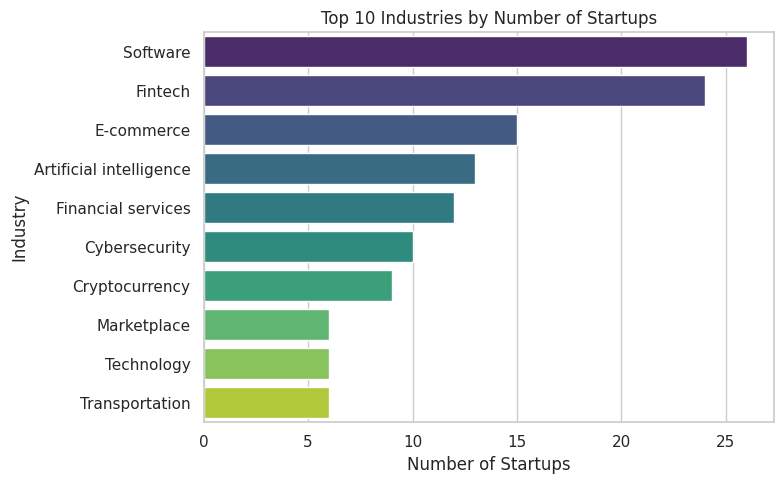

In [126]:
# 1. Top 10 industries by number of startups
# Filter out 'unknown' industry before counting

# industry_counts = df[df['Industry'] != 'unknown']['Industry'].value_counts().head(10)
# industry_counts = df['Industry'].value_counts().head(10)
industry_counts = df[
    df['Industry'].astype(str).str.strip().str.lower() != 'unknown'
]['Industry'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.title("Top 10 Industries by Number of Startups")
plt.xlabel("Number of Startups")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

<ipython-input-127-ef097de8f88d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valuation', y='Company', data=top_10_valuations, palette='viridis')


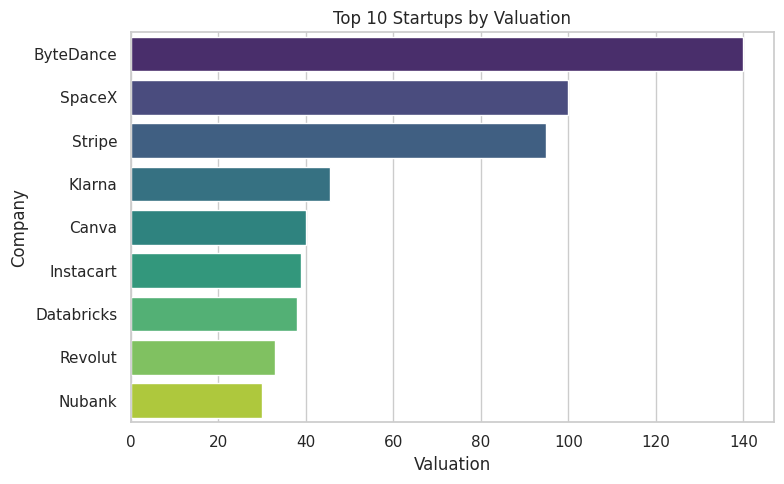

In [127]:
# 2. Top 10 startups by valuation
top_10_valuations = df.sort_values(by='Valuation', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Valuation', y='Company', data=top_10_valuations, palette='viridis')

plt.title('Top 10 Startups by Valuation')
plt.xlabel('Valuation')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

<ipython-input-128-55811b2af63c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valuation_by_industry.values, y=valuation_by_industry.index, palette='viridis')


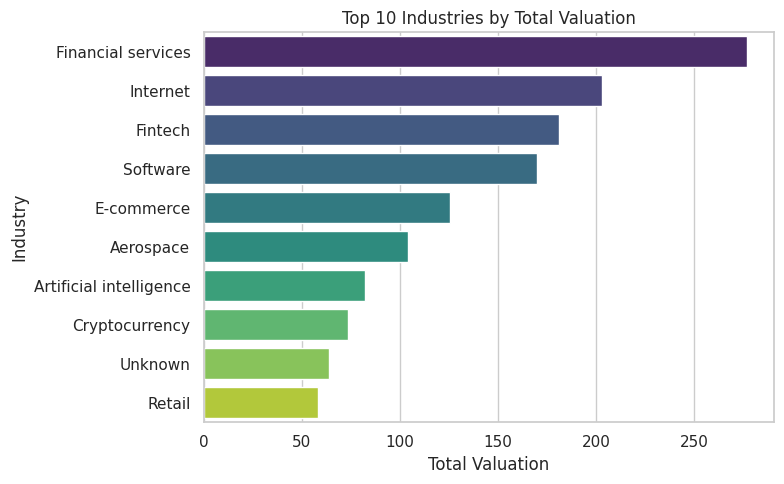

In [128]:
# 3. Top valuation by industry (top 10)
valuation_by_industry = df.groupby('Industry')['Valuation'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=valuation_by_industry.values, y=valuation_by_industry.index, palette='viridis')
plt.title("Top 10 Industries by Total Valuation")
plt.xlabel("Total Valuation")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

<ipython-input-129-1591c25a2b49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


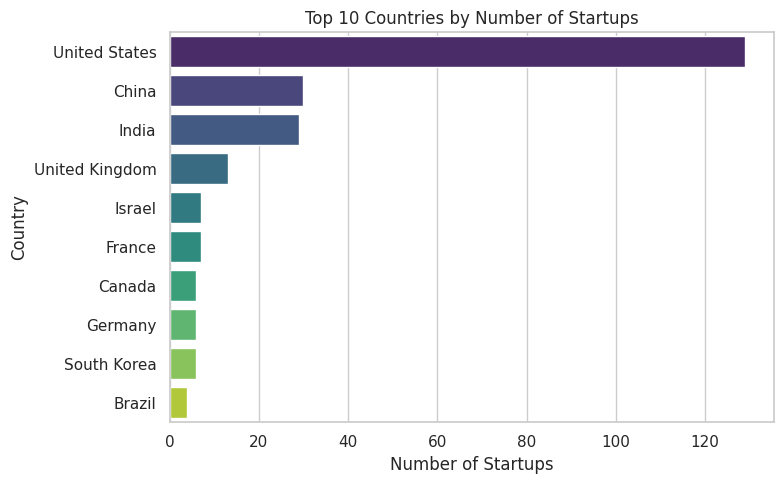

In [129]:
# 4. Top Countries by Number of Startups
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title("Top 10 Countries by Number of Startups")
plt.xlabel("Number of Startups")
plt.ylabel("Country")
plt.tight_layout()
plt.show()